In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.read_csv(r"./Books_Data_Clean.csv") 
df.head(10)

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.00,20496.000,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.50,7462.500,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.00,28677.000,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.00,24750.000,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.50,22771.500,7.99,4,Penguin Group (USA) LLC,4750
5,5,2015.0,Red Queen,Victoria Aveyard,eng,Intermediate,4.08,83354,genre fiction,19960.00,0.000,4.99,5,"Amazon Digital Services, Inc.",4000
6,6,2011.0,The Power of Habit,Charles Duhigg,eng,Intermediate,4.03,155977,genre fiction,27491.67,16495.002,6.99,6,HarperCollins Publishers,3933
7,7,1994.0,Midnight in the Garden of Good and Evil,John Berendt,eng,Intermediate,3.90,167997,nonfiction,26182.00,15709.200,6.89,8,Hachette Book Group,3800
8,8,2012.0,Hopeless,Colleen Hoover,eng,Intermediate,4.34,189938,genre fiction,26093.67,15656.202,6.99,9,HarperCollins Publishers,3733
9,9,1905.0,A Little Princess,"Frances Hodgson Burnett, Nancy Bond",eng,Intermediate,4.20,199872,genre fiction,23792.34,14275.404,6.49,10,Random House LLC,3666


In [24]:
df.columns.tolist()

['index',
 'Publishing Year',
 'Book Name',
 'Author',
 'language_code',
 'Author_Rating',
 'Book_average_rating',
 'Book_ratings_count',
 'genre',
 'gross sales',
 'publisher revenue',
 'sale price',
 'sales rank',
 'Publisher ',
 'units sold']

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [26]:
df['genre'].value_counts()

genre
genre fiction    822
nonfiction       171
fiction           62
children          15
Name: count, dtype: int64

In [27]:
df['Book_average_rating'].value_counts()

Book_average_rating
4.16    26
4.10    21
4.17    20
3.94    20
3.98    20
        ..
3.53     1
4.56     1
3.40     1
3.10     1
3.35     1
Name: count, Length: 134, dtype: int64

In [28]:
df['language_code'].value_counts()

language_code
eng      737
en-US    234
en-GB     30
en-CA      7
fre        4
spa        2
ara        2
nl         1
Name: count, dtype: int64

In [29]:
df['Author_Rating'].value_counts()

Author_Rating
Intermediate    625
Excellent       362
Famous           53
Novice           30
Name: count, dtype: int64

In [30]:
df.isna().sum()

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [31]:
# Handle missing values
df['language_code'].fillna('nl', inplace=True)  # Fill missing language_code with 'na'
df.fillna(method='ffill', inplace=True)
df.isna().sum()

/tmp/ipykernel_6441/2702033950.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['language_code'].fillna('nl', inplace=True)  # Fill missing language_code with 'na'
/tmp/ipykernel_6441/2702033950.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


index                  0
Publishing Year        0
Book Name              0
Author                 0
language_code          0
Author_Rating          0
Book_average_rating    0
Book_ratings_count     0
genre                  0
gross sales            0
publisher revenue      0
sale price             0
sales rank             0
Publisher              0
units sold             0
dtype: int64

In [32]:
df2=df.copy()
df3=df.copy()

In [33]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
# Encode categorical variables
label_encoders = {}
categorical_cols = ['language_code', 'Author_Rating', 'genre', 'Publisher ']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
    
    
df.head(10)

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",3,3,3.42,155903,2,34160.00,20496.000,4.88,1,3,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",4,2,4.23,145267,2,12437.50,7462.500,1.99,2,3,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,4,3,3.31,138669,2,47795.00,28677.000,8.69,3,0,5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,3,2,4.04,150898,1,41250.00,24750.000,7.50,3,1,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,4,2,4.04,198283,2,37952.50,22771.500,7.99,4,6,4750
5,5,2015.0,Red Queen,Victoria Aveyard,4,2,4.08,83354,2,19960.00,0.000,4.99,5,0,4000
6,6,2011.0,The Power of Habit,Charles Duhigg,4,2,4.03,155977,2,27491.67,16495.002,6.99,6,3,3933
7,7,1994.0,Midnight in the Garden of Good and Evil,John Berendt,4,2,3.90,167997,3,26182.00,15709.200,6.89,8,1,3800
8,8,2012.0,Hopeless,Colleen Hoover,4,2,4.34,189938,2,26093.67,15656.202,6.99,9,3,3733
9,9,1905.0,A Little Princess,"Frances Hodgson Burnett, Nancy Bond",4,2,4.20,199872,2,23792.34,14275.404,6.49,10,7,3666


In [34]:
df['Publisher '].value_counts()

Publisher 
0    600
7    120
6    108
3     71
1     66
8     56
5     41
4      4
2      4
Name: count, dtype: int64

In [35]:
if 'Publisher ' in df.columns:
    df.rename(columns={'Publisher ': 'Publisher'}, inplace=True)

In [36]:

df=df.drop(columns=['Book Name', 'Author', 'index'])
print(df.head(10))

   Publishing Year  language_code  Author_Rating  Book_average_rating  \
0           1975.0              3              3                 3.42   
1           1987.0              4              2                 4.23   
2           2015.0              4              3                 3.31   
3           2008.0              3              2                 4.04   
4           2011.0              4              2                 4.04   
5           2015.0              4              2                 4.08   
6           2011.0              4              2                 4.03   
7           1994.0              4              2                 3.90   
8           2012.0              4              2                 4.34   
9           1905.0              4              2                 4.20   

   Book_ratings_count  genre  gross sales  publisher revenue  sale price  \
0              155903      2     34160.00          20496.000        4.88   
1              145267      2     12437.50   

In [37]:
X = df
y = df['Book_average_rating']

# Normalize/Scale the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Convert back to DataFrame
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)

In [38]:
# Feature selection using correlation analysis
correlation_matrix = scaled_X.copy()
correlation_matrix['Book_average_rating'] = y
corr = correlation_matrix.corr()
print(corr)
important_features = corr['Book_average_rating'].sort_values(ascending=False).index
print(important_features)
print(scaled_X.columns)

                     Publishing Year  language_code  Author_Rating  \
Publishing Year             1.000000      -0.046740      -0.020345   
language_code              -0.046740       1.000000       0.012222   
Author_Rating              -0.020345       0.012222       1.000000   
Book_average_rating         0.054498      -0.033368      -0.613960   
Book_ratings_count          0.000289      -0.021780       0.255760   
genre                       0.016117      -0.011279       0.011427   
gross sales                 0.008903      -0.016763       0.215555   
publisher revenue           0.007625      -0.014238       0.176234   
sale price                  0.028616       0.033036      -0.060492   
sales rank                  0.016791      -0.009674      -0.314995   
Publisher                   0.035834       0.026192      -0.004427   
units sold                 -0.015235       0.004906      -0.160693   

                     Book_average_rating  Book_ratings_count     genre  \
Publishing Year

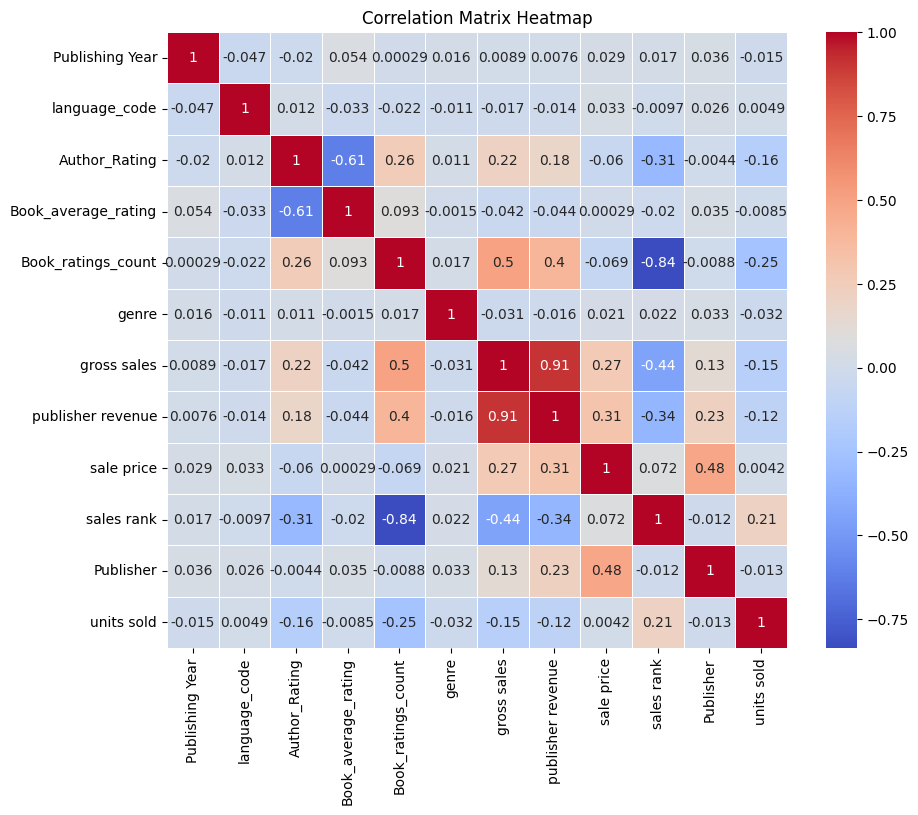

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

top_features = important_features[:11]
scaled_X = scaled_X[important_features]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [41]:
# Train Random Forest Regressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [42]:
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Evaluate models
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Linear Regression - MSE: {lr_mse}, MAE: {lr_mae}, R²: {lr_r2}")
print(f"Random Forest Regressor - MSE: {rf_mse}, MAE: {rf_mae}, R²: {rf_r2}")

Linear Regression - MSE: 8.976057496323195e-31, MAE: 9.25531717724897e-16, R²: 1.0
Random Forest Regressor - MSE: 0.00037701948598129647, MAE: 0.003375233644862545, R²: 0.9944191038972056


In [43]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for Linear Regression
lr_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5, scoring='r2')
print(f'Linear Regression CV R² scores: {lr_scores}')
print(f'Linear Regression CV mean R²: {lr_scores.mean()}')

# Perform cross-validation for Random Forest Regressor
rf_scores = cross_val_score(RandomForestRegressor(), X_train, y_train, cv=5, scoring='r2')
print(f'Random Forest CV R² scores: {rf_scores}')
print(f'Random Forest CV mean R²: {rf_scores.mean()}')


Linear Regression CV R² scores: [1. 1. 1. 1. 1.]
Linear Regression CV mean R²: 1.0


Random Forest CV R² scores: [0.99921893 0.9996623  0.9996224  0.99979274 0.99150536]
Random Forest CV mean R²: 0.9979603454536106


In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Feature selection with RFE
selector = RFE(LinearRegression(), n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.support_]
print(f'Selected features: {selected_features}')

# Train model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model = LinearRegression()
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# Evaluate the model
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R²: {r2_score(y_test, y_pred)}')


Selected features: Index(['Book_average_rating', 'Book_ratings_count', 'Publishing Year',
       'Publisher', 'sale price', 'units sold', 'language_code', 'gross sales',
       'publisher revenue', 'Author_Rating'],
      dtype='object')
MSE: 8.091353677383742e-31
MAE: 8.840280532529284e-16
R²: 1.0


In [45]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate Ridge
print('Ridge Regression')
print(f'MSE: {mean_squared_error(y_test, y_pred_ridge)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_ridge)}')
print(f'R²: {r2_score(y_test, y_pred_ridge)}')

# Evaluate Lasso
print('Lasso Regression')
print(f'MSE: {mean_squared_error(y_test, y_pred_lasso)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_lasso)}')
print(f'R²: {r2_score(y_test, y_pred_lasso)}')


Ridge Regression
MSE: 2.0649282346799572e-07
MAE: 0.00034496687691955985
R²: 0.9999969433542918
Lasso Regression
MSE: 0.011748220841816167
MAE: 0.08356726522896085
R²: 0.8260949305041683


## Key Factors Influencing Popularity and Sales

### Book Average Rating:

Influence: High ratings typically indicate positive reception by readers, which strongly correlates with higher sales.

Extent: A crucial factor, as readers often rely on ratings for purchasing decisions.

### Book Ratings Count:

Influence: The number of ratings can reflect the book's exposure and popularity. More ratings suggest more readers and higher sales.

Extent: Significant, as it represents the book’s reach and reader engagement.

### Publisher:

Influence: Certain publishers may have more established distribution channels, marketing power, and reputation, affecting sales.

Extent: Moderate to high, depending on the publisher's market strength.

### Sale Price:

Influence: Pricing can impact accessibility and attractiveness. Lower prices might lead to higher sales volumes, while higher prices could reflect premium positioning.

Extent: High, as it directly influences purchase decisions.

### Units Sold:

Influence: Direct measure of popularity. Higher units sold indicate higher demand.

Extent: This is the target variable, and thus, it is influenced by all other features.

### Sales Rank:

Influence: Often used by consumers to gauge popularity. Higher ranks (lower numerical value) usually correlate with better sales performance.

Extent: High, as it reflects comparative sales performance.

### Language Code:

Influence: Books in widely spoken languages have a larger potential audience.

Extent: Moderate, depending on the market demographics.

### Gross Sales:

Influence: Indicates the total revenue generated, which can reflect both pricing strategy and volume sold.

Extent: High, as it shows the financial success and market impact.

### Publisher Revenue:

Influence: Reflects the profitability and financial performance from the publisher’s perspective.

Extent: Moderate to high, influencing the publisher’s investment in promotion and distribution.

### Author Rating:

Influence: High ratings for an author can drive sales, as readers may be loyal to or influenced by well-regarded authors.

Extent: Significant, especially for repeat or series authors.

## Detailed Analysis
### Linear Regression Results:

The perfect R² score of 1.0 across cross-validation and the model fitting suggests that the model might be overfitting. This could indicate that the dataset has features that are very tightly correlated with the target variable or there might be data leakage.

####  Random Forest Results:

The near-perfect R² scores in cross-validation indicate a strong model fit, with slightly more realistic metrics than linear regression, suggesting robustness.

### Ridge Regression:

The very high R² and low MSE/MAE indicate that regularization has helped in maintaining the model's predictive power while potentially reducing overfitting.

### Lasso Regression:

The lower R² compared to Ridge suggests that some features may have been dropped due to their lesser importance. This provides a more conservative but potentially more generalizable model.

## Predicting Popularity Of a Book: Test Case

In [46]:
# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Ensure to load your actual dataset
# OR,
# Enter manually here
data = {
    'Publishing Year': [1975.0, 1987.0, 2015.0, 2008.0, 2011.0, 2015.0, 2011.0, 1994.0, 2012.0, 1905.0],
    'language_code': [3, 4, 4, 3, 4, 4, 4, 4, 4, 4],
    'Author_Rating': [3, 2, 3, 2, 2, 2, 2, 2, 2, 2],
    'Book_average_rating': [3.42, 4.23, 3.31, 4.04, 4.04, 4.08, 4.03, 3.90, 4.34, 4.20],
    'Book_ratings_count': [155903, 145267, 138669, 150898, 198283, 83354, 155977, 167997, 189938, 199872],
    'genre': [2, 2, 2, 1, 2, 2, 2, 3, 2, 2],
    'gross sales': [34160.00, 12437.50, 47795.00, 41250.00, 37952.50, 19960.00, 27491.67, 26182.00, 26093.67, 23792.34],
    'publisher revenue': [20496.00, 7462.50, 28677.00, 24750.00, 22771.50, 0.00, 16495.00, 15709.20, 15600.00, 23792.34],
    'sale price': [4.88, 1.99, 8.69, 7.50, 7.99, 4.99, 6.99, 6.89, 9.99, 8.99],
    'sales rank': [1, 2, 3, 3, 4, 5, 6, 8, 7, 9],
    'Publisher': [3, 3, 0, 1, 6, 0, 3, 1, 3, 4]
}
df = pd.DataFrame(data)

In [47]:

# Define features and target
X = df.drop(columns=['Book_average_rating'])
y = df['Book_average_rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [48]:

# Initialize and train the models
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train)

# Save the trained models and scaler
joblib.dump(random_forest_model, 'random_forest_model.pkl')
joblib.dump(linear_regression_model, 'linear_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Models and scaler saved successfully.")

Models and scaler saved successfully.


In [49]:
import joblib
random_forest_model = joblib.load('random_forest_model.pkl')
linear_regression_model = joblib.load('linear_regression_model.pkl')
scaler = joblib.load('scaler.pkl')

def predict_book_average_rating(publishing_year, language_code, author_rating, book_ratings_count, genre, gross_sales, publisher_revenue, sale_price, sales_rank, publisher):
    # Create a DataFrame for the input features
    input_data = pd.DataFrame({
        'Publishing Year': [publishing_year],
        'language_code': [language_code],
        'Author_Rating': [author_rating],
        'Book_ratings_count': [book_ratings_count],
        'genre': [genre],
        'gross sales': [gross_sales],
        'publisher revenue': [publisher_revenue],
        'sale price': [sale_price],
        'sales rank': [sales_rank],
        'Publisher': [publisher]
    })
        # Normalize the input data using the loaded scaler
    scaled_input_data = scaler.transform(input_data)
    
    # Predict using the trained model (use either model as needed)
    prediction = random_forest_model.predict(scaled_input_data)
    # prediction = linear_regression_model.predict(scaled_input_data)  # Uncomment to use linear regression model

    return prediction[0]

In [50]:
# Example usage
publishing_year = 2021
language_code = 4
author_rating = 3
book_ratings_count = 20000
genre = 2
gross_sales = 50000
publisher_revenue = 30000
sale_price = 9.99
sales_rank = 1
publisher = 3

In [51]:

predicted_book_average_rating = predict_book_average_rating(publishing_year, language_code, author_rating, book_ratings_count, genre, gross_sales, publisher_revenue, sale_price, sales_rank, publisher)
print(f"Predicted Book Average Rating: {predicted_book_average_rating}")


Predicted Book Average Rating: 3.4838000000000005


# PREDICTION SUCCESSFUL!!